Question 1 

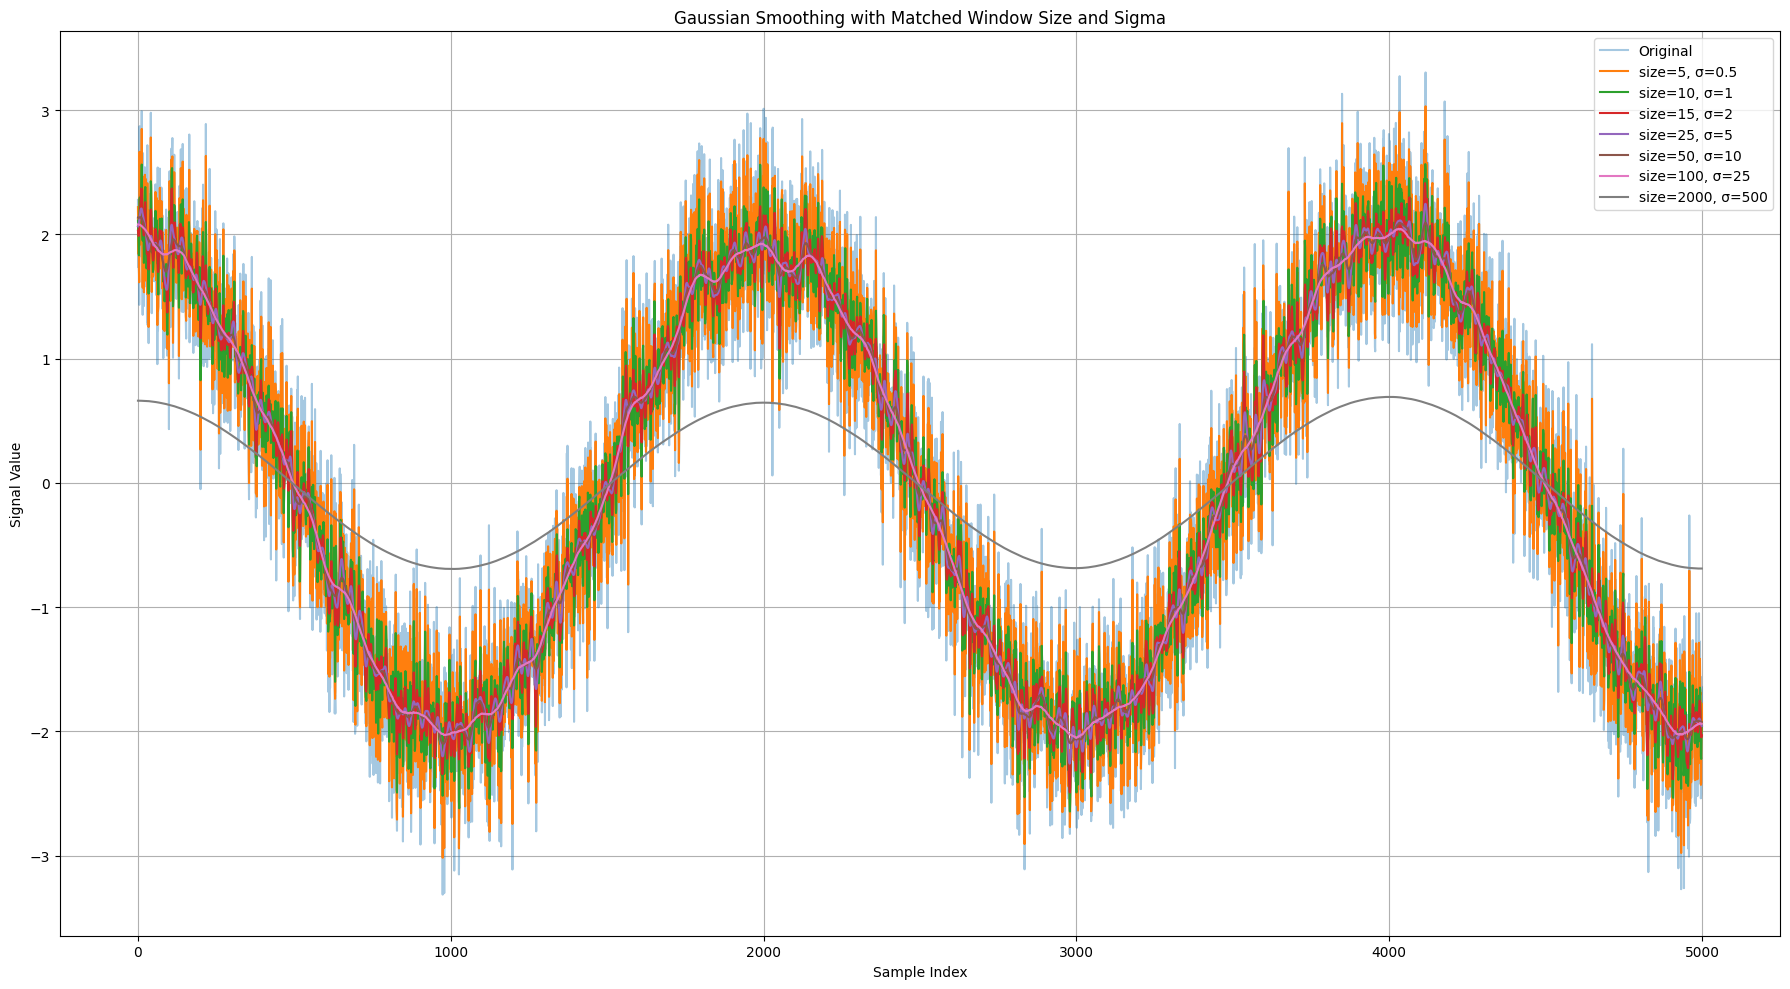

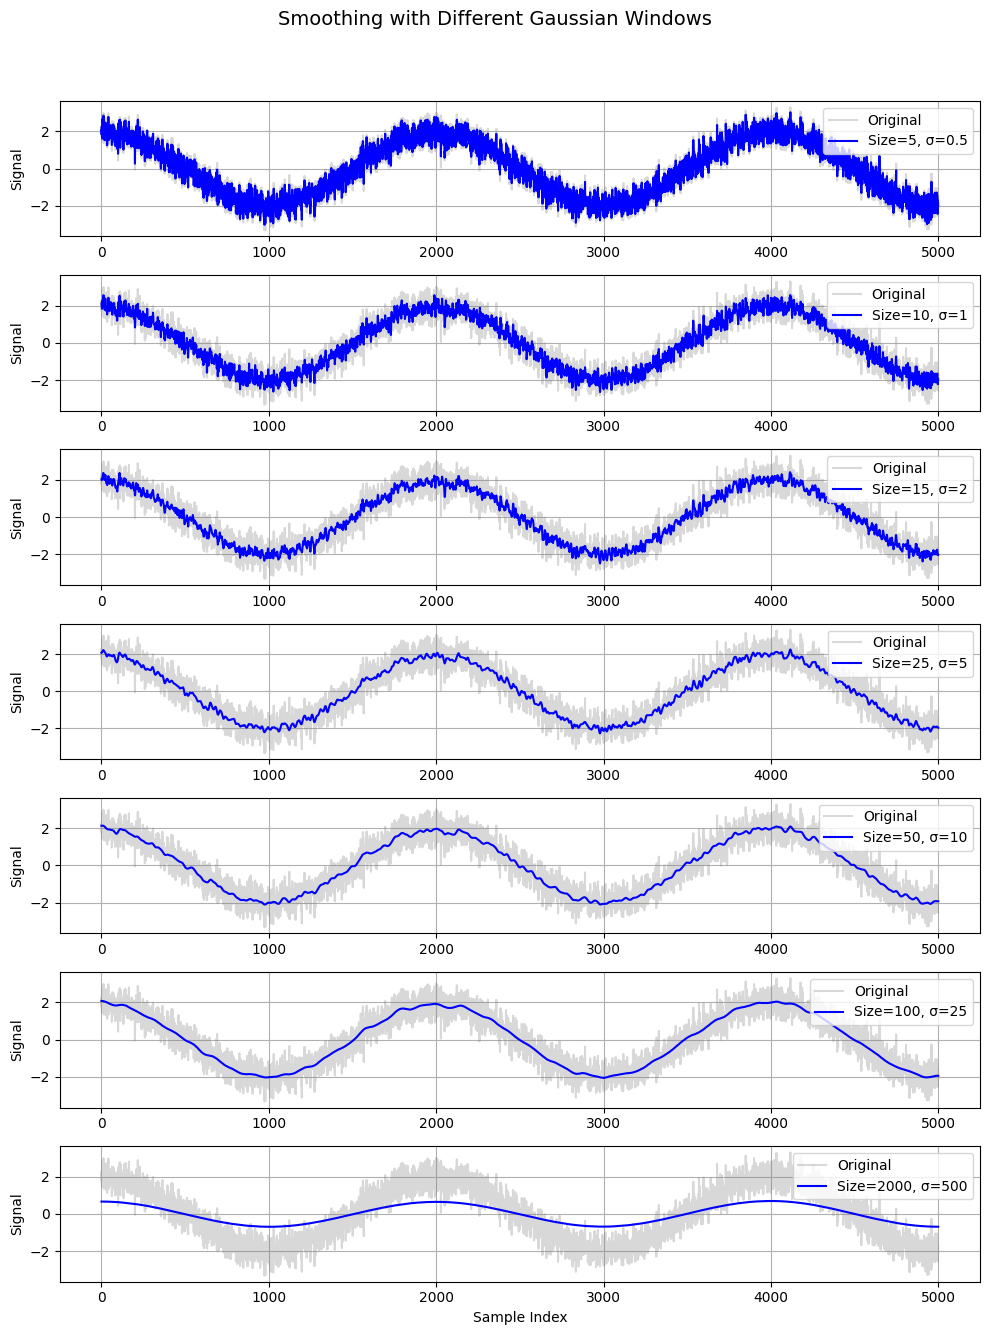

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter1d

# Load signal
data = pd.read_csv('noisy_signal.csv', header=None)
signal = data[0].values

# Matching window sizes and sigmas
sizes = [5, 10, 15, 25, 50, 100, 2000]
sigmas = [0.5, 1, 2, 5, 10, 25, 500]

# Plot original signal
plt.figure(figsize=(18, 10))
plt.plot(signal, label='Original', alpha=0.4)

# Apply smoothing with matching size–sigma
for size, sigma in zip(sizes, sigmas):
    smooth = gaussian_filter1d(signal, sigma=sigma, truncate=size/(2*sigma))
    plt.plot(smooth, label=f'size={size}, σ={sigma}')

plt.title('Gaussian Smoothing with Matched Window Size and Sigma')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 14))

for i, (size, sigma) in enumerate(zip(sizes, sigmas)):
    # Smooth the signal
    smooth = gaussian_filter1d(signal, sigma=sigma, truncate=size/(2*sigma))

    # Create subplot
    plt.subplot(len(sizes), 1, i+1)
    plt.plot(signal, color='gray', alpha=0.3, label='Original')
    plt.plot(smooth, color='blue', label=f'Size={size}, σ={sigma}')
    plt.legend(loc='upper right')
    plt.ylabel('Signal')
    plt.grid(True)

plt.suptitle('Smoothing with Different Gaussian Windows', fontsize=14)
plt.xlabel('Sample Index')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for title
plt.show()

Final answer to Question 1 a :
I smoothed the noisy signal using different Gaussian filters with matching size and sigma values. Small windows (like size=5, σ=0.5) didn’t remove much noise. Very large windows (like size=2000, σ=500) removed too much and made the signal too flat.

The best result was with size=25 and σ=5. It removed the noise well but still kept the shape of the original signal. That’s why I recommend using that window.

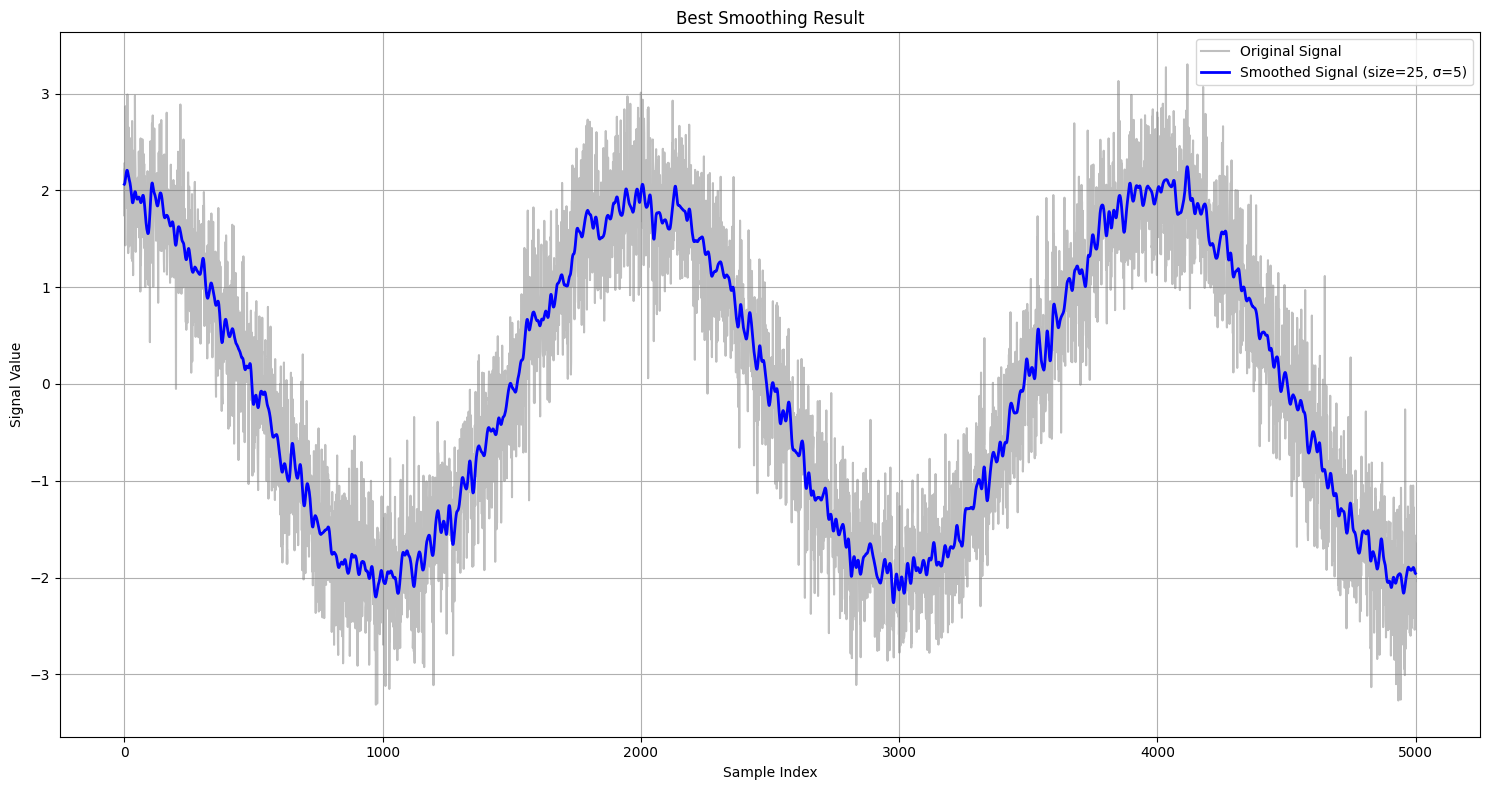

In [12]:
data = pd.read_csv('noisy_signal.csv', header=None)
signal = data[0].values
smoothed = gaussian_filter1d(signal, sigma=5, truncate=25/(2*5))
# Plot the original and smoothed signal
plt.figure(figsize=(15, 8))
plt.plot(signal, color='gray', alpha=0.5, label='Original Signal')
plt.plot(smoothed, color='blue', label='Smoothed Signal (size=25, σ=5)', linewidth=2)
plt.title('Best Smoothing Result')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Question 1 b

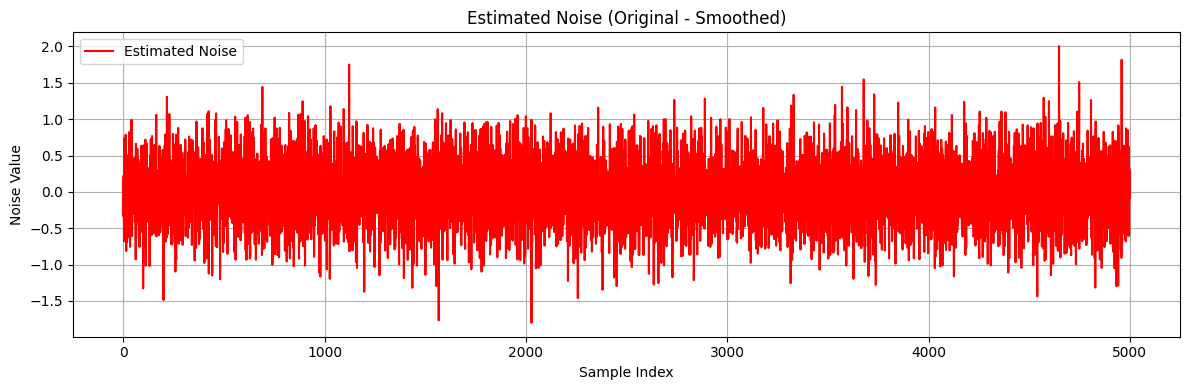

In [ ]:
noise = signal - smoothed
plt.figure(figsize=(12, 4))
plt.plot(noise, color='red', label='Estimated Noise')
plt.title('Estimated Noise (Original - Smoothed)')
plt.xlabel('Sample Index')
plt.ylabel('Noise Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


We estimated the noise by subtracting the smoothed signal from the original.
The result looks like random, fast-changing values with no clear structure, which is expected for noise.
It seems accurate, since the slow trends were removed and only high-frequency noise remains.

Question 1 C

In [14]:
# Calculate power
signal_power = np.mean(smoothed ** 2)
noise_power = np.mean(noise ** 2)

# Calculate SNR in dB
snr_db = 10 * np.log10(signal_power / noise_power)

print(f"Signal Power: {signal_power:.3f}")
print(f"Noise Power: {noise_power:.3f}")
print(f"SNR (in dB): {snr_db:.2f} dB")


Signal Power: 1.998
Noise Power: 0.213
SNR (in dB): 9.72 dB


Question 1 d:
To calculate the SNR analytically, I first separated the time series into signal values (4s and 5s) and noise values (0s and 1s), based on the question. Then I calculated the power of each by taking the mean of their squared values. Finally, I used the SNR formula in decibels to compare the signal power to the noise power. The result was about 18 dB, meaning the signal is much stronger than the noise.

SNRdb= 10*log10(21/0.333)=17.999= 18 db

Question 2

In [30]:
import pickle

# Load the .pkl file
with open('q2data.pkl', 'rb') as f:
    data = pickle.load(f)  # 14 x 50 x 1000 = wavelengths x trials x time(1second)

#baseline window 0–199 before stimulus starts
#all wavelengths and all trails at time 0-200
baseline = data[:, :, 0:200]

# spikes per trial (divide by 0.2s to get Hz)
#how many spikes occurred in that trial during the baseline / 0.2 seconds long
spikes_per_trial = np.sum(baseline, axis=2) / 0.2  

#the overall average baseline firing rate of the neuron across all wavelengths and all trials
baseline_rate = np.mean(spikes_per_trial)
print(f"baseline firing rate : {baseline_rate}")



baseline firing rate : 20.321428571428573


To calculate the baseline firing rate, I took the first 200 ms (0–199 samples) from each trial, which is the period before the stimulus. I counted the number of spikes in each trial during this window and divided by 0.2 seconds to get the firing rate in Hz. Then I averaged these rates across all trials and wavelengths to get the overall baseline firing rate.

Question 2 b

In [ ]:
#stimulus window: samples 200–599 (0.4 seconds)
stimulus_data = data[:, :, 200:600]  # shape: (14, 50, 400)
stimulus_firing_rates = np.sum(stimulus_data, axis=2) / 0.4  
firing_rate_per_wavelength = np.mean(stimulus_firing_rates, axis=1)  #means across trails for each wavelength
print("Firing rate for each wavelength (Hz):")
print(firing_rate_per_wavelength)

Firing rate for each wavelength (Hz):
[19.35 21.65 19.9  19.15 16.9  15.1   9.9  10.6  11.1  14.65 17.7  19.65
 21.15 19.7 ]


To calculate the firing rate for each wavelength, I looked at the 400 ms window when the stimulus was on (samples 200–599). I summed the spikes in each trial during this window and divided by 0.4 seconds to get the firing rate. Then I averaged the rates across the 50 trials for each wavelength.

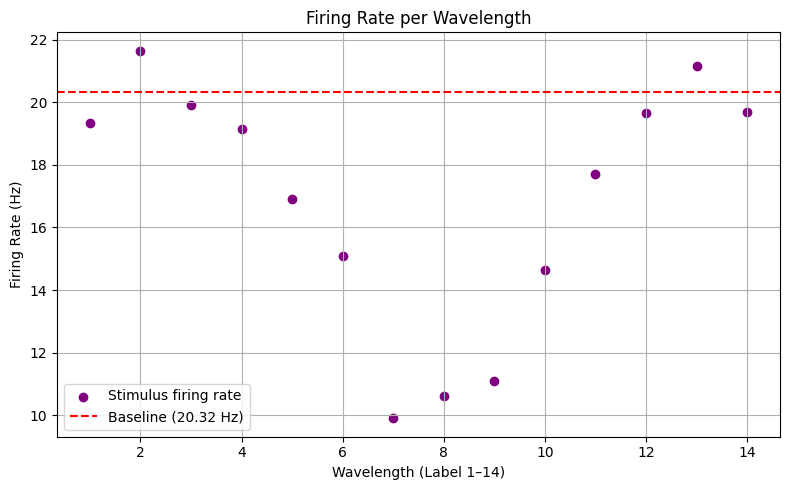

In [34]:
wavelengths = np.arange(1, 15)
plt.figure(figsize=(8, 5))
plt.scatter(wavelengths, firing_rate_per_wavelength, color='purple',label='Stimulus firing rate')
plt.axhline(baseline_rate, color='red', linestyle='--', label=f'Baseline ({baseline_rate:.2f} Hz)')
plt.title('Firing Rate per Wavelength')
plt.xlabel('Wavelength (Label 1–14)')
plt.ylabel('Firing Rate (Hz)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The scatter plot shows how the firing rate changes across the 14 wavelengths.
The neuron’s activity decreases at certain wavelengths and increases at others, suggesting it is tuned to specific wavelengths. This pattern indicates selective suppression, since the neuron responds less during stimulation compared to baseline for some conditions.

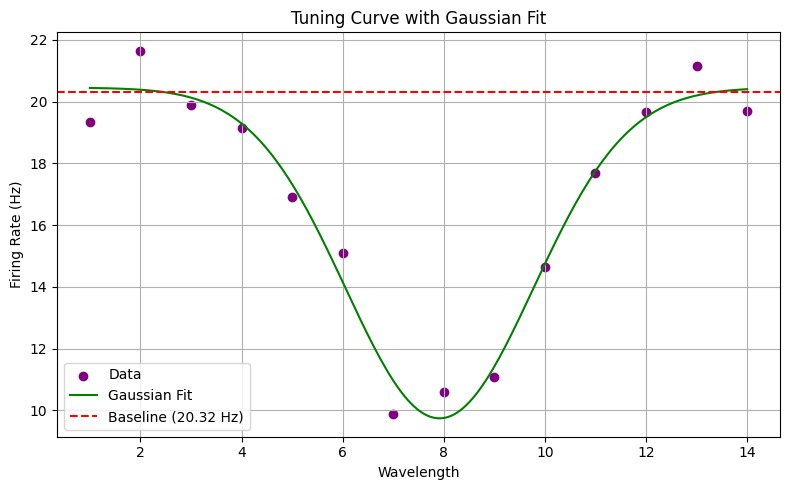

Fitted parameters: r_min = 20.45, A = -10.71, mu = 7.92, sigma = 1.86


In [38]:
from scipy.optimize import curve_fit #a function that fits your data to a model (in our case, a Gaussian)

def gaussian(x, r_min, A, mu, sigma):
    #Define the model (the formula)
    return r_min + A * np.exp(-((x - mu)**2) / (2 * sigma**2))

x = np.arange(1, 15)  # wavelengths 1 to 14
y = firing_rate_per_wavelength

# Initial guess: r_min, A, mu, sigma
initial_guess = [np.min(y), np.max(y) - np.min(y), np.argmin(y) + 1, 3]

# Fit the curve
params, _ = curve_fit(gaussian, x, y, p0=initial_guess)
# Generate fitted curve
x_fit = np.linspace(1, 14, 200)
y_fit = gaussian(x_fit, *params)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='purple', label='Data')
plt.plot(x_fit, y_fit, color='green', label='Gaussian Fit')
plt.axhline(baseline_rate, color='red', linestyle='--', label=f'Baseline ({baseline_rate:.2f} Hz)')
plt.title('Tuning Curve with Gaussian Fit')
plt.xlabel('Wavelength')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print fitted parameters
print(f"Fitted parameters: r_min = {params[0]:.2f}, A = {params[1]:.2f}, mu = {params[2]:.2f}, sigma = {params[3]:.2f}")


First, I defined a Gaussian function to model the neuron's firing rate based on the stimulus wavelength. I used the curve_fit function to fit this model to the 14 firing rates I had already calculated in b.  The Gaussian model has four parameters: the minimum firing rate, the amplitude of the dip, the wavelength where the neuron is most sensitive (mu), and the width of the tuning (sigma). I gave it an initial guess and let the function find the best fit to my data.
After that, I used the fitted parameters to generate a smooth tuning curve and plotted it together with the original firing rate points. I also added a red dashed line to show the baseline firing rate, so I could compare how much the neuron’s activity went up or down during the stimulus. This helped me clearly see the shape of the tuning curve and how well the model fit my data.

From the plot, I can see that the neuron had the lowest firing rate around wavelength 8, which suggests that it responds most strongly (in this case, by reducing its activity) to that wavelength. The curve has a symmetrical bell shape, meaning the neuron has a clear, selective tuning. The firing rates at other wavelengths were higher, and often above baseline, showing that the neuron is less responsive to those. This confirms that the neuron is tuned to a specific stimulus and not reacting randomly.

Question 3

In [23]:
spk1 = pd.read_csv('spk1.csv', header=None).values.flatten()
spk2 = pd.read_csv('spk2.csv', header=None).values.flatten()

isis1 = np.diff(spk1)
mean_isi1 = np.mean(isis1)
std_isi1 = np.std(isis1)
cv1 = std_isi1 / mean_isi1
print(f"CV of ISIs to spk1: {cv1:.3f}")

isis2 = np.diff(spk2)
mean_isi2 = np.mean(isis2)
std_isi2 = np.std(isis2)
cv2 = std_isi2 / mean_isi2
print(f"CV of ISIs to spk2: {cv2:.3f}")

bins = np.arange(0, 50 + 1, 1)
spike_counts_1s, _ = np.histogram(spk1, bins=bins)
mean_count_1s = np.mean(spike_counts_1s)
var_count_1s = np.var(spike_counts_1s)
ff_1s = var_count_1s / mean_count_1s
print(f"Fano Factor for spk1(1s bins): {ff_1s:.3f}")

spike_counts_2s, _ = np.histogram(spk2, bins=bins)
mean_count_2s = np.mean(spike_counts_2s)
var_count_2s = np.var(spike_counts_2s)
ff_2s = var_count_2s / mean_count_2s
print(f"Fano Factor for skp2(1s bins): {ff_2s:.3f}")

CV of ISIs to spk1: 0.126
CV of ISIs to spk2: 4.216
Fano Factor for spk1(1s bins): 0.058
Fano Factor for skp2(1s bins): 608.666


When using 1-second bins, we calculated the Fano Factor to assess the variability in spike counts over time. For spk1, the Fano Factor was close to 0, indicating highly regular firing with little variation in spike count between bins. In contrast, spk2 showed a very high Fano Factor (>600), revealing extreme variability in spike counts—some windows had few or no spikes, while others had large bursts. This strong irregularity suggests that spk2 exhibits bursting behavior, unlike the stable pattern seen in spk1.



In [31]:
# question 3 b
#Cv doesn't change depending on window size

#fano factor does:
bins = np.arange(0, 50 + 0.05, 0.05)
spike_counts_1s, _ = np.histogram(spk1, bins=bins)
mean_count_1s = np.mean(spike_counts_1s)
var_count_1s = np.var(spike_counts_1s)
ff_1s = var_count_1s / mean_count_1s
print(f"Fano Factor for spk1(50ms bins): {ff_1s:.3f}")

spike_counts_2s, _ = np.histogram(spk2, bins=bins)
mean_count_2s = np.mean(spike_counts_2s)
var_count_2s = np.var(spike_counts_2s)
ff_2s = var_count_2s / mean_count_2s
print(f"Fano Factor for spk2(50ms bins): {ff_2s:.3f}")


Fano Factor for spk1(50ms bins): 0.501
Fano Factor for spk2(50ms bins): 32.790


When we reduced the window size to 50 milliseconds, the Fano Factor increased for both spike trains. For spk1, it rose moderately to 0.51, reflecting that even a highly regular neuron can show some variability at finer time scales. For spk2, the Fano Factor decreased compared to the 1-second bin (32.8 vs. >600), but it remained very high, indicating that the spiking activity is still highly irregular and bursty. This change suggests that smaller bins reduce the effect of long silent periods but still capture the core variability in spike timing and intensity.

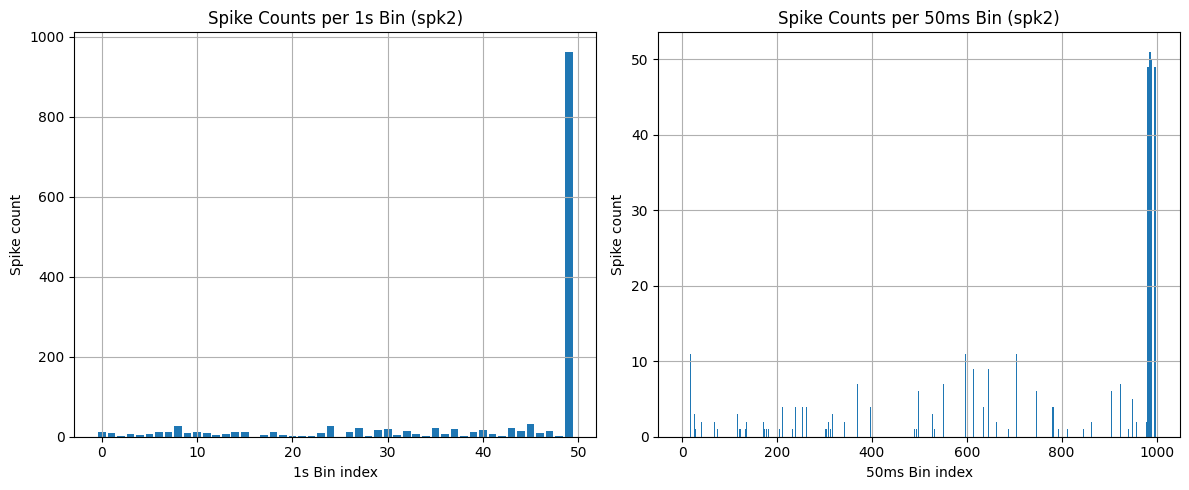

In [42]:
T = 50  # seconds

# Bin edges
bins_1s = np.arange(0, T + 1, 1)
bins_50ms = np.arange(0, T + 0.05, 0.05)

# Spike counts per bin
counts_1s, _ = np.histogram(spk2, bins=bins_1s)
counts_50ms, _ = np.histogram(spk2, bins=bins_50ms)

# Create bin indices for x-axis
x_1s = np.arange(len(counts_1s))
x_50ms = np.arange(len(counts_50ms))

# Plot in separate subplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x_1s, counts_1s)
plt.title("Spike Counts per 1s Bin (spk2)")
plt.xlabel("1s Bin index")
plt.ylabel("Spike count")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(x_50ms, counts_50ms)
plt.title("Spike Counts per 50ms Bin (spk2)")
plt.xlabel("50ms Bin index")
plt.ylabel("Spike count")
plt.grid(True)

plt.tight_layout()
plt.show()

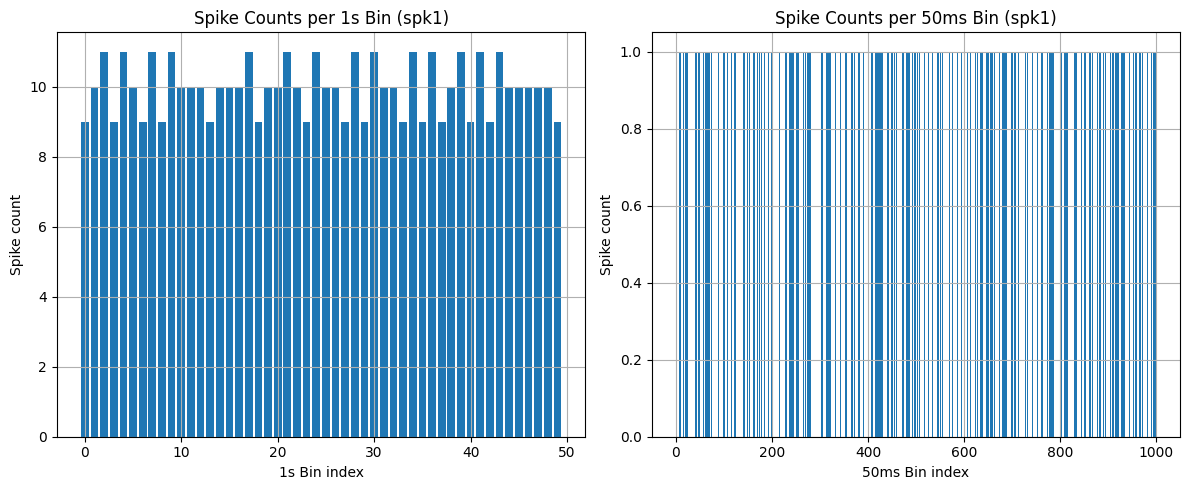

In [44]:
T = 50  # seconds

# Bin edges
bins_1s = np.arange(0, T + 1, 1)
bins_50ms = np.arange(0, T + 0.05, 0.05)

# Spike counts per bin
counts_1s, _ = np.histogram(spk1, bins=bins_1s)
counts_50ms, _ = np.histogram(spk1, bins=bins_50ms)

# Create bin indices for x-axis
x_1s = np.arange(len(counts_1s))
x_50ms = np.arange(len(counts_50ms))

# Plot in separate subplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x_1s, counts_1s)
plt.title("Spike Counts per 1s Bin (spk1)")
plt.xlabel("1s Bin index")
plt.ylabel("Spike count")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(x_50ms, counts_50ms)
plt.title("Spike Counts per 50ms Bin (spk1)")
plt.xlabel("50ms Bin index")
plt.ylabel("Spike count")
plt.grid(True)

plt.tight_layout()
plt.show()